In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

import warnings

warnings.filterwarnings('ignore')

In [6]:
list_name = [f'これはテストです。これはテストです。_{i}' for i in range(1, 21)]

In [27]:
df = pd.DataFrame({
    'ri_name': list_name,
    'ratio': np.random.rand(20)
})

In [36]:
df.query(f'ratio >= 0.1').append(pd.DataFrame({'ri_name': ['その他'], 'ratio': [0]})).reset_index(drop=True)

,ri_name,ratio
0,これはテストです。これはテストです。_1,0.326216
1,これはテストです。これはテストです。_2,0.474880
2,これはテストです。これはテストです。_4,0.138477
3,これはテストです。これはテストです。_5,0.135811
4,これはテストです。これはテストです。_6,0.381743
5,これはテストです。これはテストです。_7,0.376173
6,これはテストです。これはテストです。_8,0.619715
7,これはテストです。これはテストです。_9,0.419543
8,これはテストです。これはテストです。_10,0.882218
9,これはテストです。これはテストです。_11,0.102030


In [82]:
def plot_importance(df, ri_name, value, output_path, display_point=3, truncate=None):
    if truncate is not None:
        df = df.query(f'{value} >= {truncate}') \
               .append(pd.DataFrame({ri_name: ['その他'], value: [truncate]})).reset_index(drop=True)
        df.reset_index(drop=True, inplace=True)
    df.sort_values(value, inplace=True)
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)
    bar_rects = ax.barh(df[ri_name], df[value], color='teal', edgecolor='black', linewidth=.4)
    for rect in bar_rects:
        x = rect.get_width()
        y = rect.get_y()
        height = rect.get_height()
        if truncate is not None and x <= truncate:
            ax.text(x=1.01 * x,
            y=y + height / 2,
            s=str(round(x, display_point)) + ' 以下',
            ha='left',
            va='center')
        else:
            ax.text(x=1.01 * x,
                    y=y + height / 2,
                    s=round(x, display_point),
                    ha='left',
                    va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.25)
    plt.show()

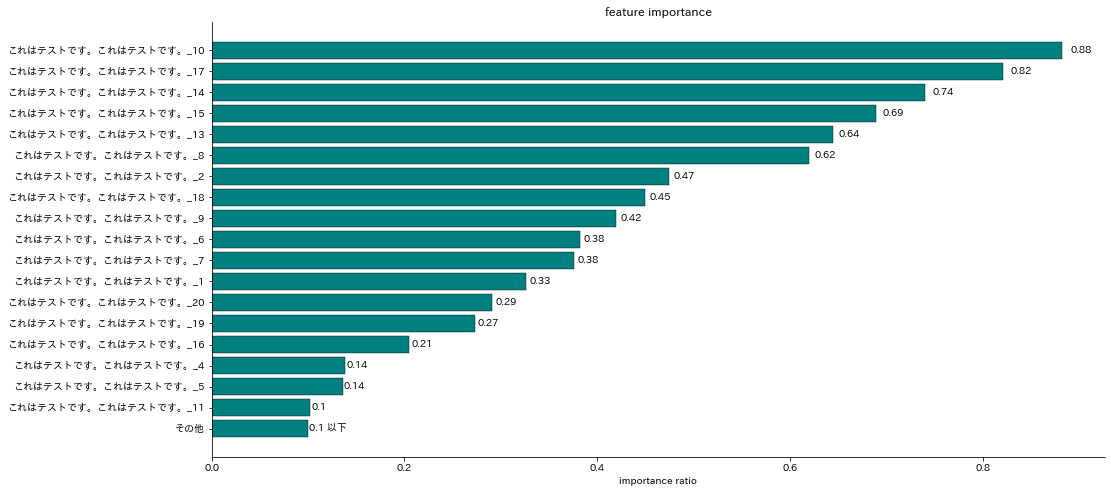

In [79]:
plot_importance(df, 'ri_name', 'ratio', display_point=2, truncate=0.1)

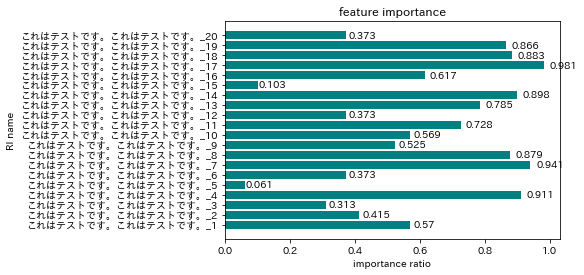

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
bar_rects = ax.barh(df['ri_name'], df['ratio'], color='teal')
for rect in bar_rects:
    x = rect.get_width()
    y = rect.get_y()
    height = rect.get_height()
    ax.text(x=1.02 * x,
            y=y + height / 2,
            s=round(x, 3),
            ha='left',
            va='center')
ax.set_title('feature importance')
ax.set_xlabel('importance ratio')
ax.set_ylabel('RI name')
#ax.set_xlim(0, 70)
plt.show()